In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./gearbox-fault-logistic-regression.ipynb
./gearbox-fault-raw-datasets-logistic-regression.ipynb
./test.ipynb
./.ipynb_checkpoints/gearbox-fault-logistic-regression-checkpoint.ipynb
./.ipynb_checkpoints/test-checkpoint.ipynb
./input/gearbox-fault-diagnosis-stacked-datasets/h30hz.csv
./input/gearbox-fault-diagnosis-stacked-datasets/b30hz.csv
./input/gearbox-fault-diagnosis-stdev-of-accelerations/h30hz_stdev.csv
./input/gearbox-fault-diagnosis-stdev-of-accelerations/b30hz_stdev.csv


In [3]:
healthyDataset = pd.read_csv("./input/gearbox-fault-diagnosis-stacked-datasets/h30hz.csv")
brokenDataset = pd.read_csv("./input/gearbox-fault-diagnosis-stacked-datasets/b30hz.csv")

# Exploring the dataset

In [4]:
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,failure,load
count,2.021119e+06,2.021119e+06,2.021119e+06,2.021119e+06,2.021119e+06,2.021119e+06
mean,1.341575e-03,2.589083e-04,4.453338e-03,6.101136e-04,4.974032e-01,4.564659e+01
std,6.157919e+00,4.408471e+00,3.963242e+00,4.466629e+00,4.999934e-01,2.865902e+01
min,-5.872160e+01,-3.294430e+01,-2.916740e+01,-3.133450e+01,0.000000e+00,0.000000e+00
25%,-3.265495e+00,-2.432110e+00,-2.116310e+00,-2.373490e+00,0.000000e+00,2.000000e+01
50%,-7.987520e-02,9.292100e-02,4.860470e-02,1.161210e-01,0.000000e+00,5.000000e+01
75%,3.135560e+00,2.582300e+00,2.196570e+00,2.483190e+00,1.000000e+00,7.000000e+01
max,5.670660e+01,3.092830e+01,2.693890e+01,3.734990e+01,1.000000e+00,9.000000e+01


In [5]:
dataset["load"]

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
1005306    90.0
1005307    90.0
1005308    90.0
1005309    90.0
1005310    90.0
Name: load, Length: 2021119, dtype: float64

Text(0, 0.5, 'Count of rows')

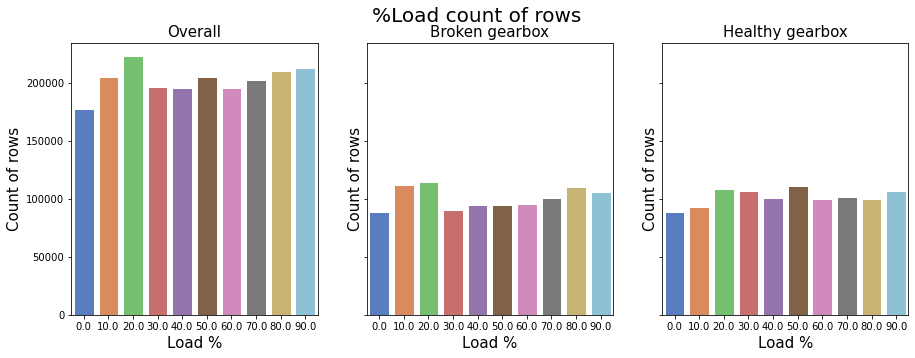

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
   
fig.suptitle('%Load count of rows', fontsize=20)
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#Overall
overall = sns.countplot(ax=axes[0], x='load',data=dataset)
axes[0].set_title('Overall', fontsize=15)
overall.set_xlabel('Load %',fontsize=15)
overall.set_ylabel('Count of rows',fontsize=15)

# Broken gearbox
broken = sns.countplot(ax=axes[1], x='load',data=brokenDataset)
axes[1].set_title('Broken gearbox', fontsize=15)
broken.set_xlabel('Load %',fontsize=15)
broken.set_ylabel('Count of rows',fontsize=15)

# Healthy gearbox
heathly = sns.countplot(ax=axes[2], x='load',data=healthyDataset)
axes[2].set_title('Healthy gearbox' , fontsize=15)
heathly.set_xlabel('Load %',fontsize=15)
heathly.set_ylabel('Count of rows',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

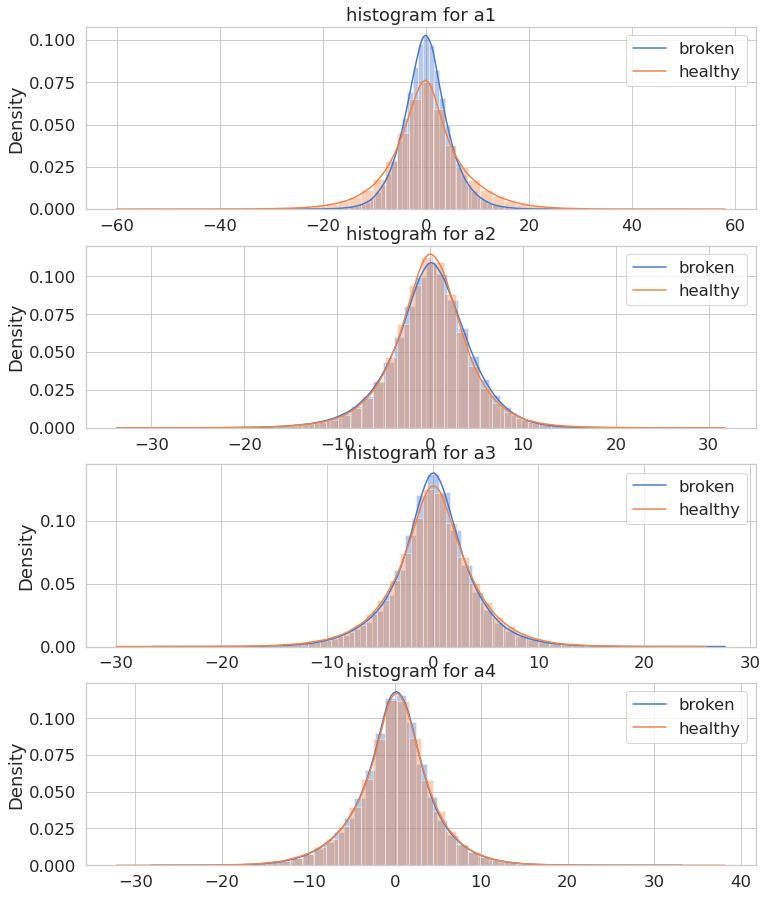

In [7]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.failure == 1], bins=50)
    sns.distplot(dataset[cn][dataset.failure == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(['broken', 'healthy'])
    ax.set_title('histogram for ' + str(cn))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

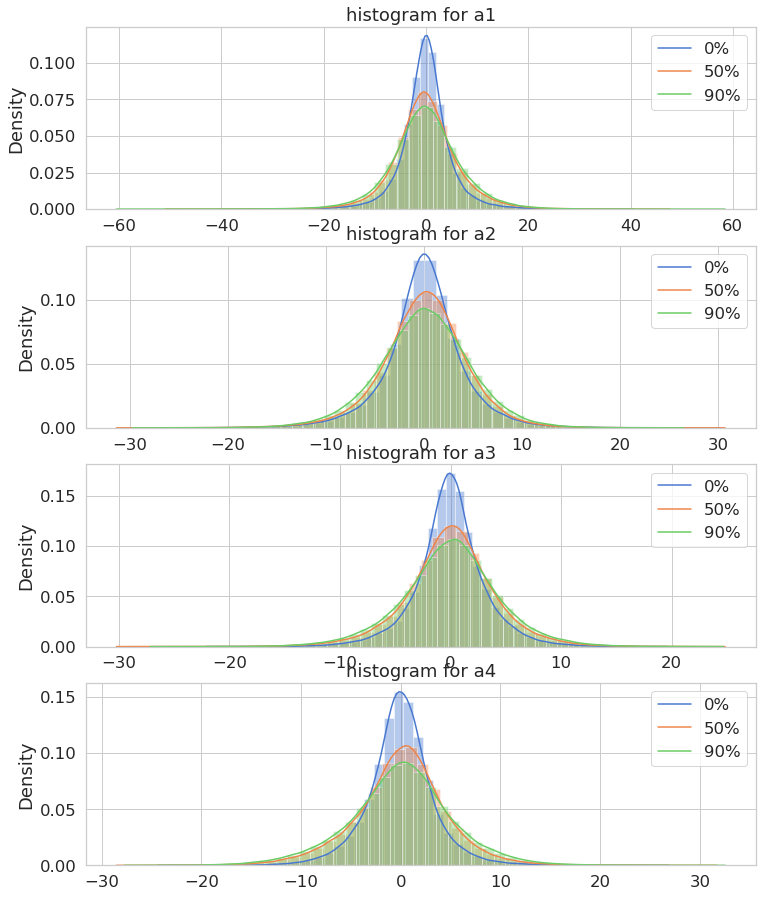

In [8]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

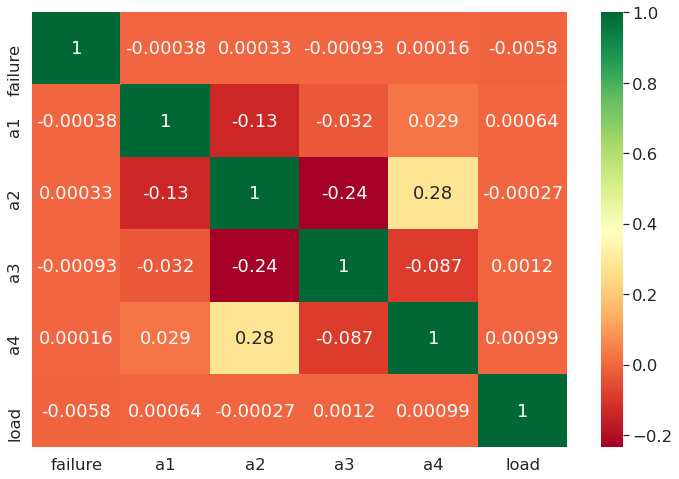

In [22]:
rcParams['figure.figsize'] = 12, 8
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# Logistic regression

In [10]:
from sklearn.model_selection import train_test_split

# Predictor variable (features)
columns = ['a1', 'a2', 'a3', 'a4', 'load']
X = dataset[columns]
# Target variable: Failure (boolean)
y = dataset.iloc[:,-2]

In [11]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1005306    1.0
1005307    1.0
1005308    1.0
1005309    1.0
1005310    1.0
Name: failure, Length: 2021119, dtype: float64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616895 entries, 133527 to 305711
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   a1      1616895 non-null  float64
 1   a2      1616895 non-null  float64
 2   a3      1616895 non-null  float64
 3   a4      1616895 non-null  float64
 4   load    1616895 non-null  float64
dtypes: float64(5)
memory usage: 74.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404224 entries, 179038 to 244663
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a1      404224 non-null  float64
 1   a2      404224 non-null  float64
 2   a3      404224 non-null  float64
 3   a4      404224 non-null  float64
 4   load    404224 non-null  float64
dtypes: float64(5)
memory usage: 18.5 MB
None


In [14]:
print( type(y_train), y_train)
print( type(y_test), y_test)

<class 'pandas.core.series.Series'> 133527    0.0
543776    0.0
922069    0.0
135494    1.0
61016     0.0
         ... 
152315    0.0
963395    0.0
117952    0.0
468597    1.0
305711    0.0
Name: failure, Length: 1616895, dtype: float64
<class 'pandas.core.series.Series'> 179038    1.0
803778    0.0
334327    0.0
801301    1.0
784635    1.0
         ... 
662511    1.0
376041    1.0
624805    0.0
812333    0.0
244663    1.0
Name: failure, Length: 404224, dtype: float64


In [15]:
# Import logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Setup the model
logis = LogisticRegression(max_iter=1000)

# Train the model
logis.fit(X_train,y_train)

# Predict Outcome for the test set
y_pred = logis.predict(X_test)

## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[159263, 153655],
       [ 43856,  47450]])

In [17]:
print( logis.score(X_test,y_test) , logis.score(X_train,y_train) )

0.5113823028815706 0.5119435708564872


## Classification report

In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.51      0.78      0.62    203119
         1.0       0.52      0.24      0.32    201105

    accuracy                           0.51    404224
   macro avg       0.51      0.51      0.47    404224
weighted avg       0.51      0.51      0.47    404224



## ROC curve

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


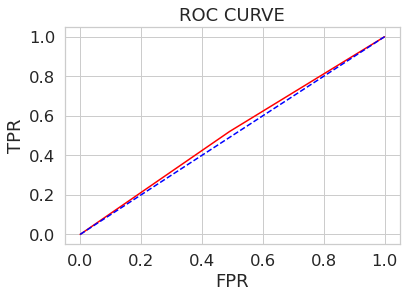

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
fpr,tpr,_= roc_curve(logis.predict(X),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='red',Label='ROC_Curve')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()